In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("bmi.csv")

In [3]:
print(data.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
data.isnull().values.any()

False

In [8]:
data.duplicated().values.any()

True

In [10]:
print(data[data.duplicated()]) 

     Gender  Height  Weight  Index
187  Female     182      84      3
310    Male     171     147      5
327  Female     167      85      4
355    Male     174      90      3
365    Male     141      80      5
381    Male     191      62      1
382    Male     177     117      4
395  Female     164      71      3
400  Female     195     104      3
462    Male     179      56      1
482  Female     142      86      5


In [12]:
data.drop_duplicates(inplace = True)

In [13]:
print(data)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[489 rows x 4 columns]


In [14]:
print(data.duplicated().values.any())

False


# Data Visualization

In [15]:
import seaborn as sns

C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


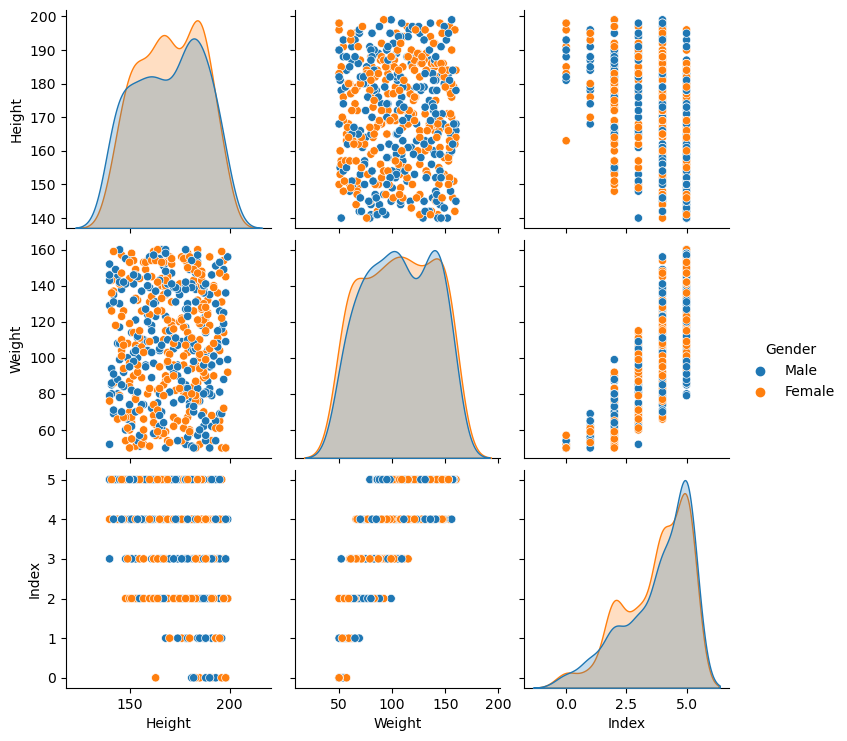

In [17]:
sns.pairplot(data,hue="Gender") #Looking at how the different features relate to each other

<Axes: xlabel='Index', ylabel='count'>

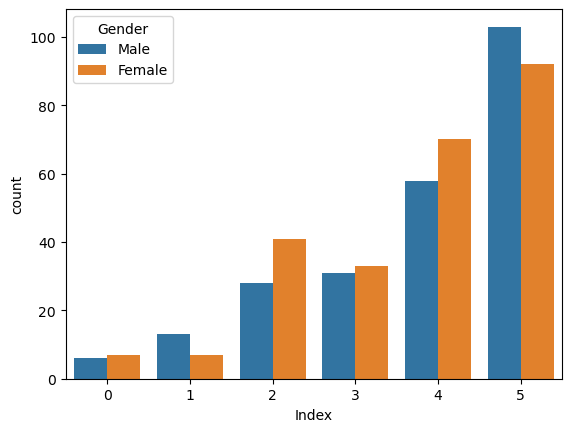

In [18]:
sns.countplot(data,x = "Index",hue = "Gender")

C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


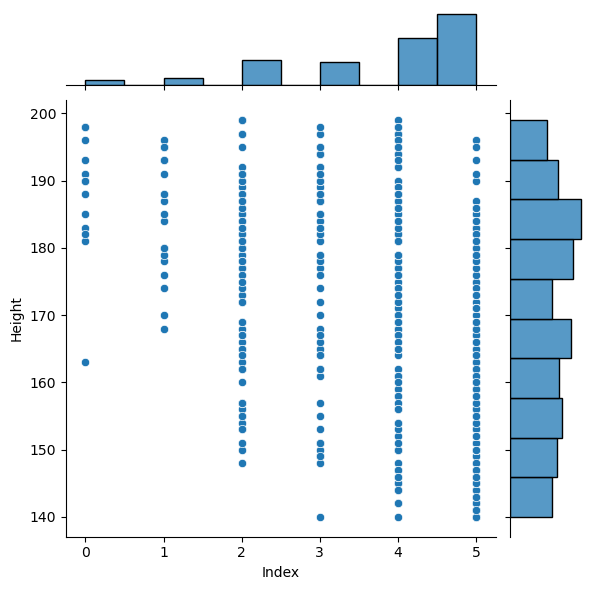

In [20]:
sns.jointplot(data,x="Index",y = "Height")

C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


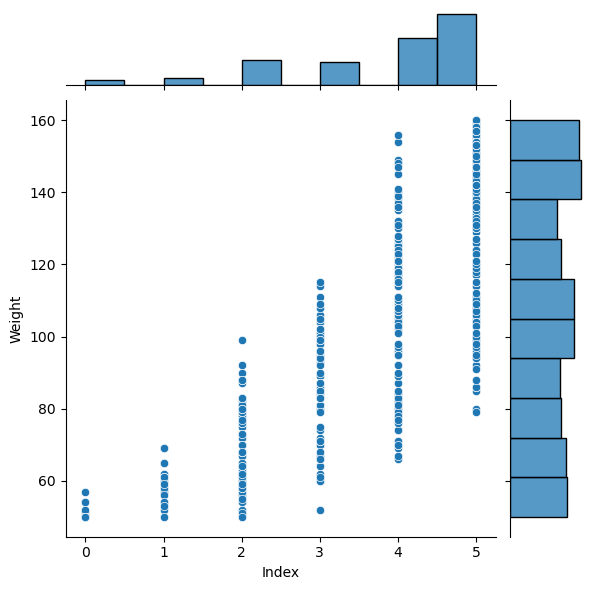

In [21]:
sns.jointplot(data,x="Index",y = "Weight")

# Converting Categorical Features

Converting categorical features to dummy variables otherwise our machine learning algorithm would not be able to take in thsoe features as inputs.

In [22]:
sex = pd.get_dummies(data["Gender"], drop_first=True) # Creating dummy variable
new_df  = pd.concat([data,sex], axis=1) # Creating a new dataframe by concatenating the previous dataframe with the dummy variable created
new_df.drop("Gender", inplace=True, axis = 1)

In [23]:
print(new_df)

     Height  Weight  Index   Male
0       174      96      4   True
1       189      87      2   True
2       185     110      4  False
3       195     104      3  False
4       149      61      3   True
..      ...     ...    ...    ...
495     150     153      5  False
496     184     121      4  False
497     141     136      5  False
498     150      95      5   True
499     173     131      5   True

[489 rows x 4 columns]


# Model Selections

# 1. K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(new_df.drop("Index",axis=1))
scaled_features = scaler.transform(new_df.drop("Index",axis=1))

In [29]:
print(new_df.columns)

Index(['Height', 'Weight', 'Index', 'Male'], dtype='object')


In [30]:
df_features = pd.DataFrame(scaled_features,columns =['Height', 'Weight','Male'])
print(df_features)

       Height    Weight      Male
0    0.249722 -0.320211  1.022754
1    1.166954 -0.597951  1.022754
2    0.922359  0.111828 -0.977753
3    1.533847 -0.073332 -0.977753
4   -1.278997 -1.400309  1.022754
..        ...       ...       ...
484 -1.217849  1.438805 -0.977753
485  0.861210  0.451287 -0.977753
486 -1.768188  0.914186 -0.977753
487 -1.217849 -0.351071  1.022754
488  0.188573  0.759886  1.022754

[489 rows x 3 columns]


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
X = df_features
y = new_df["Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.71      0.71      0.71         7
           2       0.79      0.88      0.83        17
           3       0.88      0.82      0.85        17
           4       0.81      0.88      0.84        33
           5       0.96      0.93      0.94        69

    accuracy                           0.88       147
   macro avg       0.86      0.79      0.81       147
weighted avg       0.88      0.88      0.88       147



[[ 2  1  1  0  0  0]
 [ 0  5  2  0  0  0]
 [ 0  1 15  1  0  0]
 [ 0  0  1 14  2  0]
 [ 0  0  0  1 29  3]
 [ 0  0  0  0  5 64]]


The result obtained above can be further improved by choosing a suitable value for K

In [36]:
import numpy as np

Text(0, 0.5, 'Error Rate')

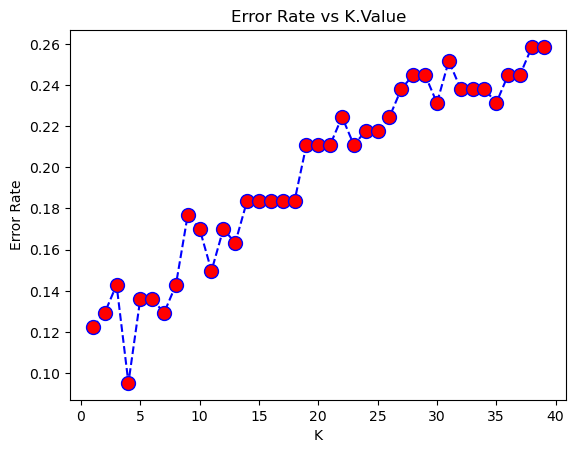

In [37]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predi = knn.predict(X_test)
    error_rate.append(np.mean(predi != y_test))

plt.plot(range(1,40), error_rate, color = "blue",linestyle = "dashed",marker = "o", markerfacecolor = "red", markersize = 10)
plt.title("Error Rate vs K.Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [41]:
knn = KNeighborsClassifier(n_neighbors=4) # k = 4
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.86      0.86      0.86         7
           2       0.81      1.00      0.89        17
           3       1.00      0.76      0.87        17
           4       0.82      0.94      0.87        33
           5       0.97      0.93      0.95        69

    accuracy                           0.90       147
   macro avg       0.91      0.83      0.85       147
weighted avg       0.92      0.90      0.90       147



[[ 2  1  1  0  0  0]
 [ 0  6  1  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  2 13  2  0]
 [ 0  0  0  0 31  2]
 [ 0  0  0  0  5 64]]


Which is somewhat better as compared to when K = 1

# 2.Using Support Vector Machines

In [43]:
from sklearn.svm import SVC

In [44]:
model = SVC()
X = new_df.drop("Index", axis=1)
y = new_df["Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test,model_pred))
print("/n")
print(confusion_matrix(y_test,model_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.50      1.00      0.67        17
           3       1.00      0.24      0.38        17
           4       0.72      0.94      0.82        33
           5       0.97      0.93      0.95        69

    accuracy                           0.79       147
   macro avg       0.53      0.52      0.47       147
weighted avg       0.79      0.79      0.75       147

/n
[[ 0  0  4  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  6  4  7  0]
 [ 0  0  0  0 31  2]
 [ 0  0  0  0  5 64]]


C:\Users\hottec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hottec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hottec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our model above could be improved by implementing a GirdSearch which just aims at trying a bunch of all possible combinations to see what works best.

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.362 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.362 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.368 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.368 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.382 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.362 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.362 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.368 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.368 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.382 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.725 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [47]:
print(classification_report(y_test,grid_predictions))
print("\n")
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.88      1.00      0.93         7
           2       0.89      0.94      0.91        17
           3       1.00      0.88      0.94        17
           4       0.88      0.91      0.90        33
           5       0.96      0.96      0.96        69

    accuracy                           0.93       147
   macro avg       0.93      0.91      0.92       147
weighted avg       0.93      0.93      0.93       147



[[ 3  0  1  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  1 16  0  0  0]
 [ 0  0  1 15  1  0]
 [ 0  0  0  0 30  3]
 [ 0  0  0  0  3 66]]


Hence, the use of GridSearch seems to have greatly improved our model

# 3. Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
X = new_df.drop("Index", axis=1)
y = new_df["Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
tree = DecisionTreeClassifier()

In [52]:
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [53]:
print(classification_report(y_test,tree_pred))
print(confusion_matrix(y_test,tree_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      0.86      0.86         7
           2       0.86      0.71      0.77        17
           3       0.62      0.76      0.68        17
           4       0.65      0.67      0.66        33
           5       0.90      0.88      0.89        69

    accuracy                           0.80       147
   macro avg       0.81      0.77      0.79       147
weighted avg       0.81      0.80      0.80       147

[[ 3  0  1  0  0  0]
 [ 0  6  1  0  0  0]
 [ 0  1 12  4  0  0]
 [ 0  0  0 13  4  0]
 [ 0  0  0  4 22  7]
 [ 0  0  0  0  8 61]]


Lastly, let's see how well our model will perform with Random Forest Classifier

# 4. Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators=100)

In [56]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [57]:
print(classification_report(y_test,rfc_pred))
print("\n")
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.67      0.57      0.62         7
           2       0.70      0.82      0.76        17
           3       0.83      0.59      0.69        17
           4       0.75      0.82      0.78        33
           5       0.93      0.94      0.94        69

    accuracy                           0.83       147
   macro avg       0.76      0.71      0.73       147
weighted avg       0.83      0.83      0.83       147



[[ 2  1  1  0  0  0]
 [ 1  4  2  0  0  0]
 [ 0  1 14  1  1  0]
 [ 0  0  3 10  4  0]
 [ 0  0  0  1 27  5]
 [ 0  0  0  0  4 65]]


# Conclusion

Based on the classification report and confusion matrix of the different classification algorithms used, SVM(Support Vector Machines) seems to have worked best in our scenerio.